<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/katas/algorithms/LinearRegression_BostonHousing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


## Instructions

This is a self-correcting exercise generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Kata: Predict Housing Prices with Linear Regression

The goal of this kata is to predict the median price (in $1,000's) of homes given their characteristics.

The [Boston Housing Prices](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) dataset is frequently used to test regression algorithms.

![Boston suburb](images/boston_housing.jpg)

The dataset contains information gathered in the 1970s concerning housing in the Boston suburban area. Each house has the following features.

| Feature | Description |
| --- | --- |
| 0 | Per capita crime rate by town |
| 1 | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| 2 | Proportion of non-retail business acres per town. |
| 3 | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| 4 | Nitric oxides concentration (parts per 10 million) |
| 5 | Average number of rooms per dwelling |
| 6 | Proportion of owner-occupied units built prior to 1940 |
| 7 | Weighted distances to five Boston employment centres |
| 8 | Index of accessibility to radial highways |
| 9 | Full-value property-tax rate per $10,000 |
| 10 | Pupil-teacher ratio by town |
| 11 | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| 12 | Lower status of the population |



## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

### Question

Import the needed packages.

In [37]:
# Import ML packages (edit this list if needed)
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

## Step 1: Loading the data

### Question

Load the Boston Housing dataset included with scikit-learn into the `dataset` variable.

In [19]:
dataset = load_boston()

In [20]:
# Describe the dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
# Show a sample of raw training data
df_boston = pd.DataFrame(dataset.data)
# Add target to DataFrame
df_boston.columns = dataset.feature_names
df_boston['MEDV'] = dataset.target
df_boston.sample(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
169,2.44953,0.0,19.58,0.0,0.605,6.402,95.2,2.2625,5.0,403.0,14.7,330.04,11.32,22.3
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65,28.4
293,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81,21.4
252,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53,29.6
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6


## Step 2: Preparing the data

### Question

Store input data and labels into the `x` and `y` variables respectively.

In [30]:
x, y = dataset.data, dataset.target

In [31]:
print(f'x: {x.shape}. y: {y.shape}')

assert x.shape == (506, 13)
assert y.shape == (506,)

x: (506, 13). y: (506,)


### Question

Prepare data for training. Store the data subsets in variables named `x_train`/`y_train` and `x_test`/`y_test` with a 20% ratio.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

assert x_train.shape == (404, 13)
assert y_train.shape == (404,)
assert x_test.shape == (102, 13)
assert y_test.shape == (102,)

x_train: (404, 13). y_train: (404,)
x_test: (102, 13). y_test: (102,)


### Question

Scale features by standardization while preventing information leakage from the test set.

In [35]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
mean_train = x_train.mean()
std_train = x_train.std()
print(f'mean_train: {mean_train}. std_train: {std_train}')

assert np.abs(np.max(mean_train)) < 10**-6
assert np.abs(np.max(std_train - 1)) < 10**-6

mean_train: 1.7073589728279636e-15. std_train: 0.9999999999999999


## Step 3: Training a model

### Question

Create a `SGDRegressor` instance and store it into the `model` variable. Fit this model on the training data.

In [54]:
model = SGDRegressor(penalty="l2")
model.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

## Step 4: Evaluating the model

### Question

Compute the training and test MSE into the `mse_train` and `mse_test` variables respectively.

In [55]:
mse_train = model.score(x_train, y_train) 
mse_test = model.score(x_test, y_test)
y_test_pred = model.predict(x_test)

Training MSE: 0.73. Test MSE: 0.74


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

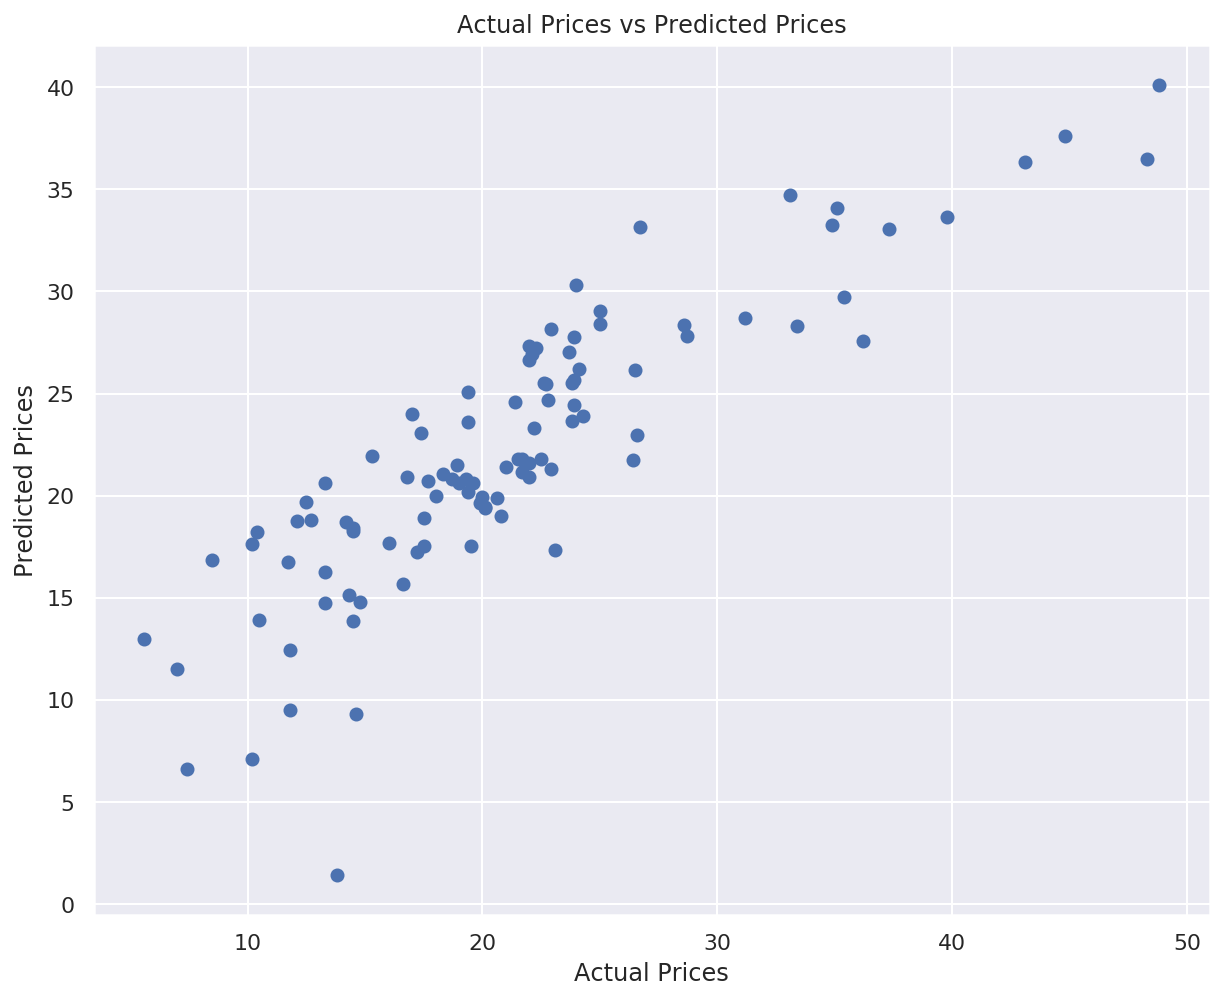

In [56]:
print (f'Training MSE: {mse_train:.2f}. Test MSE: {mse_test:.2f}')

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

### Question

Go back to step 3 and try to obtain the best possible test MSE by tweaking the `SGDRegressor` parameters.

## Step 5: Use another regression algorithm

### Question

- Create and fit a `LinearRegression` instance, which uses the normal equation instead of gradient descent.
- Compute the training and test MSE for this instance (variables `mse_train_n` and `mse_test_n`). How does it compare to the `SGDRegressor` in this case?

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

In [ ]:
print (f'Training MSE: {mse_train_n:.2f}. Test MSE: {mse_test_n:.2f}')

plt.scatter(y_test, y_test_pred_n)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")